### (S6) rlt = 6.3
```N_s_grid = 16```

```N_vpar_grid = 64``` 

```N_mu_grid = 9```

In [1]:
# Import modules
import gkw
import derivative
import h5py
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
from matplotlib.transforms import Bbox
import plot

In [2]:
# Plot parameter
%matplotlib inline
plot.parameters(True, 22, (12,8), 100)

In [3]:
# File import
data = 'S6_rlt6.3'
resolution = 'Nsgrid16_Nvpargrid64_Nmugrid9'
rlt = data.split("rlt",1)[1]
filename = '../data/'+data+'/'+resolution+'/gkwdata.h5'
f = h5py.File(filename,"r+")

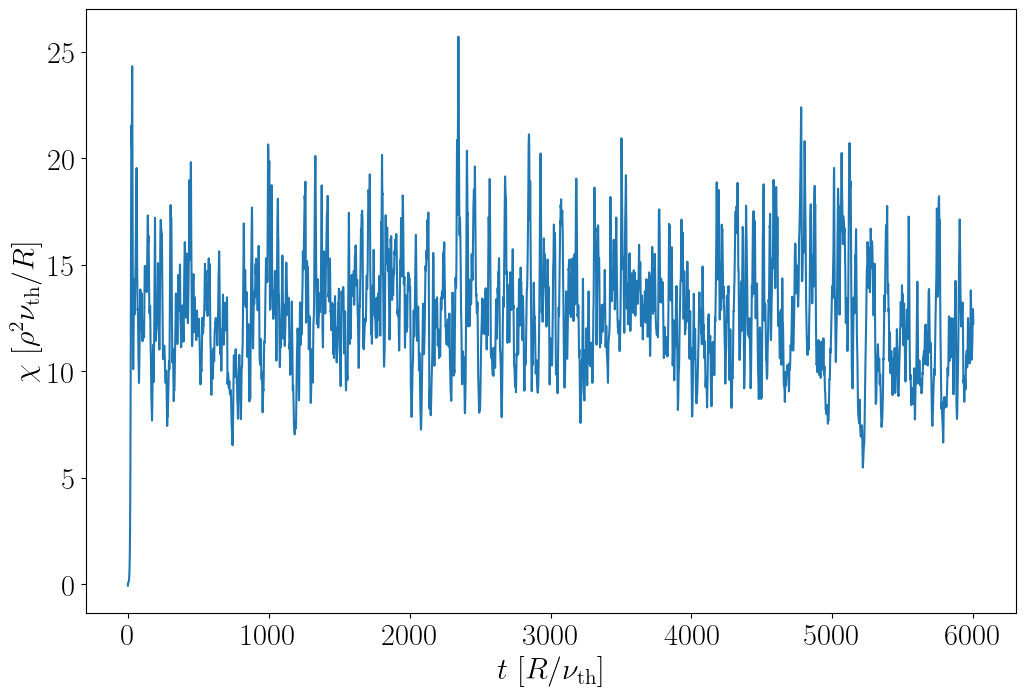

In [13]:
# Heat flux
eflux_data, time = gkw.get_eflux_from_hdf5_file(f)

plt.plot(time[0], eflux_data)

plt.xlabel(r'$t~[R/ \nu_{\mathrm{th}}]$')
plt.ylabel(r'$\chi~[\rho^2 \nu_{\mathrm{th}} / R]$')

plt.savefig('../pictures/'+data+'/'+resolution+'/'+data+'_'+resolution+'_eflux.pdf', bbox_inches='tight')

In [5]:
# Elektrostatic potencial
phi = f[gkw.find_key(f, 'phi')][()]
nx = phi.shape[0]

In [6]:
# Mean over y to get a approximation for the zonal potenzial
zonal_pot = np.mean(phi,1)

In [7]:
# Finite Difference for shearing rate omega_ExB

# Stepsize
rad_boxsize = f[gkw.find_key(f, 'lxn')][()][0]
rad_coord = f[gkw.find_key(f,'xphi')][0,:]
dx = rad_boxsize/nx

ddphi= derivative.finite_second_order(zonal_pot[:,:], dx, 'period')
wexb = 0.5 * ddphi

print('rad_boxsize :', rad_boxsize, '; stepsize :',dx)

rad_boxsize : 76.27048929506829 ; stepsize : 0.595863197617721


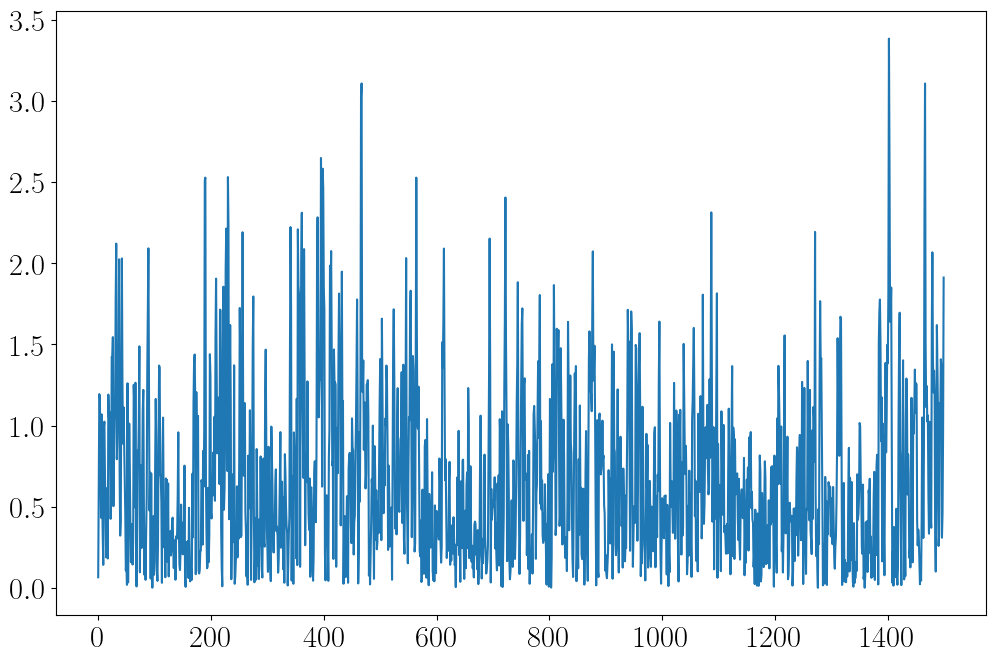

In [8]:
# Fourier plot of time domain

wexb_fft = np.fft.fftshift(wexb)
wexb_amp = np.abs(wexb_fft)

plt.plot(wexb_amp[1,500:2000])


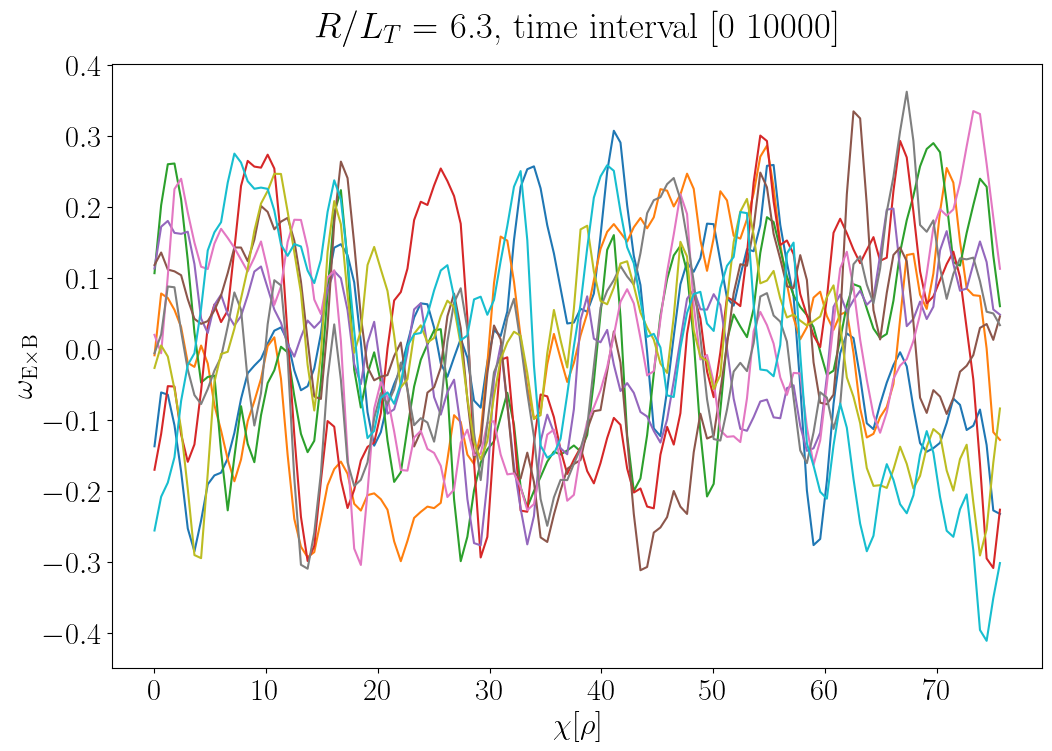

In [14]:
# Plot all
start, end = 0, 999 

while end <= zonal_pot.shape[1]:
    
    wexb_mean = np.mean(wexb[:,start:end],1)

    plt.plot(rad_coord, wexb_mean)

    start += 1000
    end += 1000

plt.title(r'$R/L_T =$ ' + rlt + ', time interval [0 '+str(zonal_pot.shape[1])+']', pad=20)
plt.xlabel(r'$\chi[\rho]$')
plt.ylabel(r'$\omega_{\mathrm{E \times B}}$')

plt.savefig('../pictures/'+data+'/'+resolution+'/'+data+'_'+resolution+'_wexb_all.pdf', bbox_inches='tight')

Maximal Amplitude:  0.15642483265299104


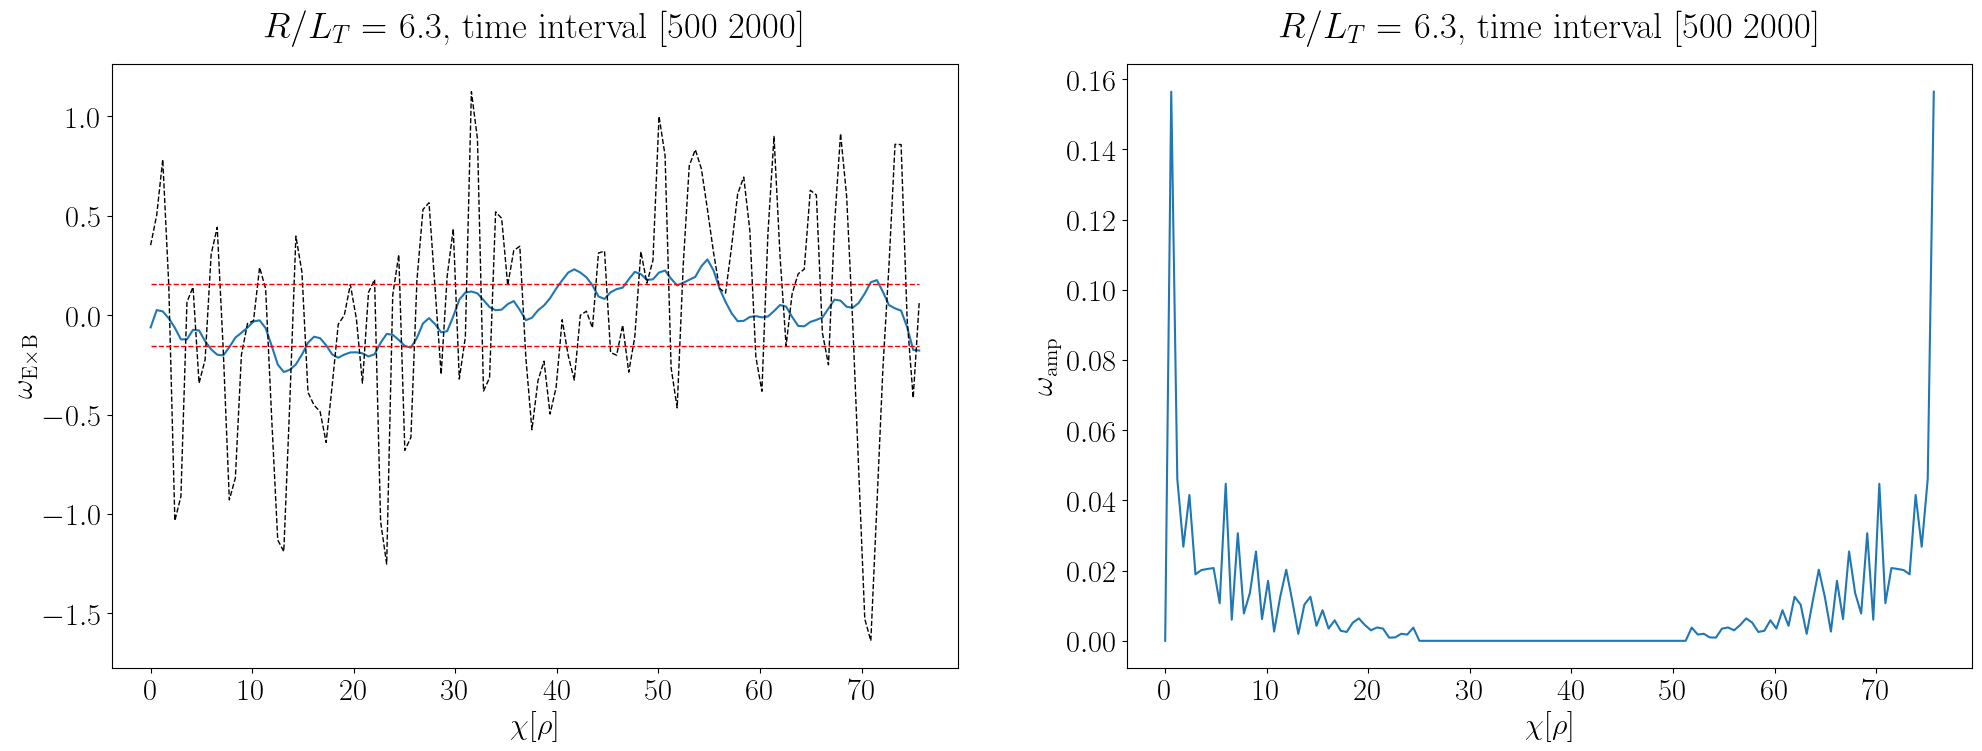

In [10]:
# Plot from 500:2000 timesteps with mean over that interval
# Plot of a signal in the middle of the time interval (1250)
start, end = 500, 2000
middle = int((end - start)/2 + start)

# Shearing rate with mean over time
wexb_rad_mean = np.mean(wexb[:,start:end],1)
wexb_rad_middle = wexb[:,middle]

# FT{shearing rate}
wexb_rad_mean_fft = np.fft.fft(wexb_rad_mean)
wexb_rad_mean_amp = 2/ zonal_pot.shape[0] * np.abs(wexb_rad_mean_fft)
wexb_rad_mean_amp_max = max(wexb_rad_mean_amp)

print('Maximal Amplitude: ', wexb_rad_mean_amp_max)

fig, ax = plt.subplots(1, 2, figsize=(24,8))

# Plot shearing rate
ax[0].plot(rad_coord, wexb_rad_mean)
ax[0].plot(rad_coord, wexb_rad_middle, 'black', linestyle='--', linewidth=1)
ax[0].plot(rad_coord, np.repeat(wexb_rad_mean_amp_max, len(rad_coord)), 'r', linestyle='--', linewidth=1)
ax[0].plot(rad_coord, -np.repeat(wexb_rad_mean_amp_max, len(rad_coord)), 'r', linestyle='--', linewidth=1)
ax[0].set_title(r'$R/L_T =$ ' + rlt + ', time interval [' + str(start) + ' ' + str(end) + ']', pad=20)
ax[0].set_xlabel(r'$\chi[\rho]$')
ax[0].set_ylabel(r'$\omega_{\mathrm{E \times B}}$')

plot.savefig_subplot(fig, ax[0], '../pictures/'+data+'/'+resolution+'/'+data+'_'+resolution+'_wexb_'+str(start)+'_'+str(end)+'.pdf', 0.02)

# FT{shearing rate}
ax[1].plot(rad_coord, wexb_rad_mean_amp)
ax[1].set_title(r'$R/L_T =$ ' + rlt + ', time interval [' + str(start) + ' ' + str(end) + ']', pad=20)
ax[1].set_xlabel(r'$\chi[\rho]$')
ax[1].set_ylabel(r'$\omega_{\mathrm{amp}}$')

plot.savefig_subplot(fig, ax[1],'../pictures/'+data+'/'+resolution+'/'+data+'_'+resolution+'_Amp_Rad_'+str(start)+'_'+str(end)+'.pdf', 0.02)

Maximal Amplitude:  0.11008102932964296


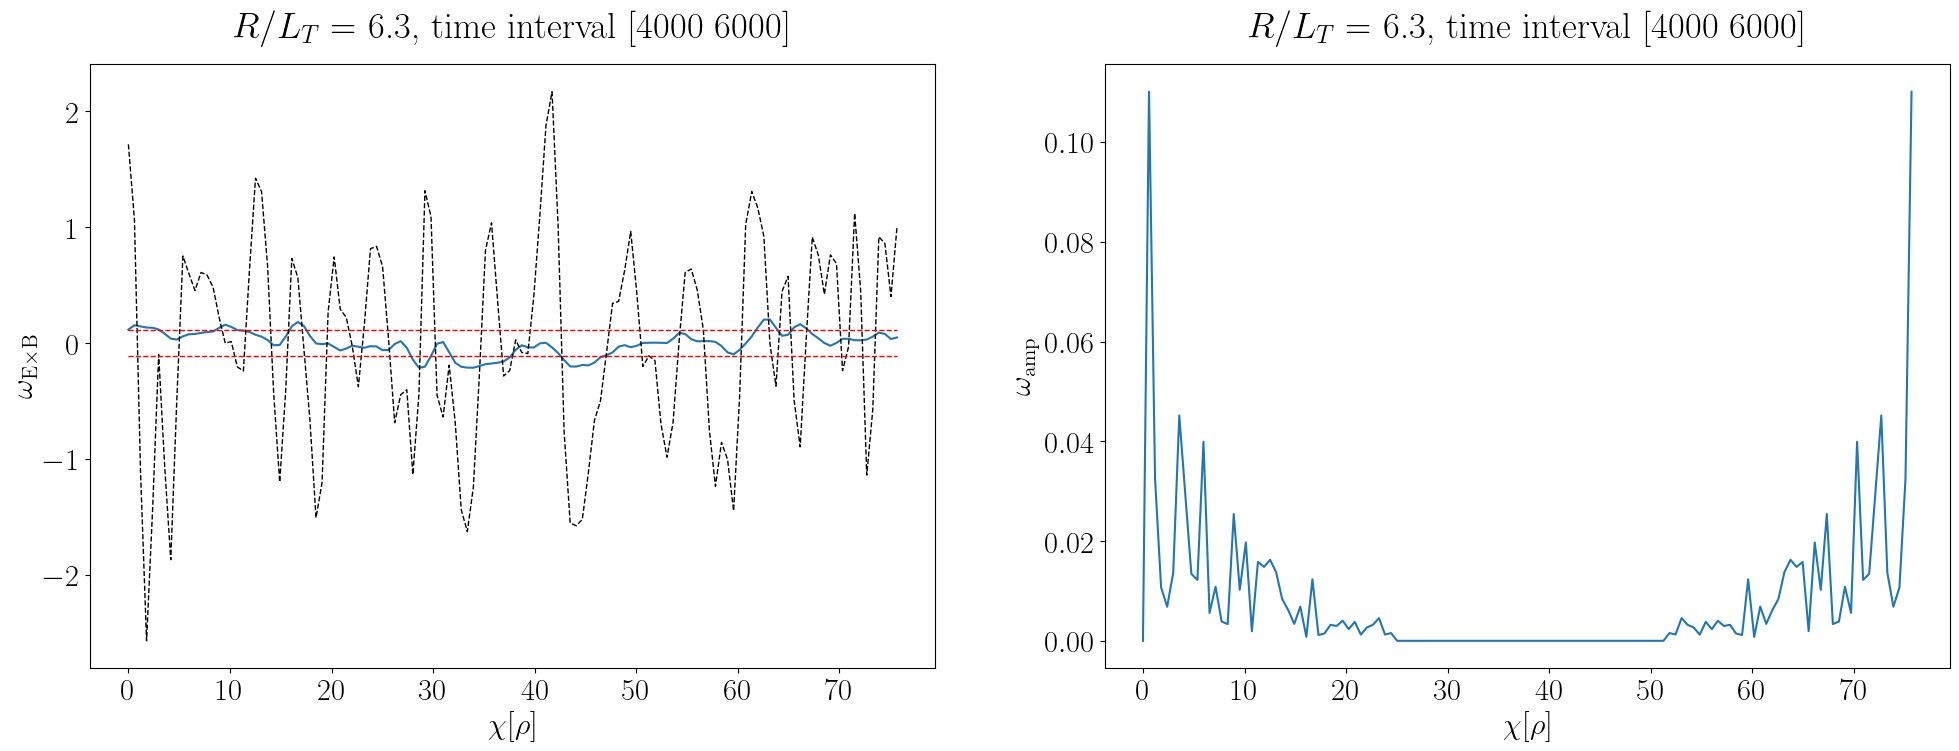

In [11]:
# Plot from 4000:6000 timesteps with mean over that interval
# Plot of a signal in the middle of the time interval (5000)
start, end = 4000, 6000
middle = int((end - start)/2 + start)

# Shearing rate with mean over time
wexb_rad_mean = np.mean(wexb[:,start:end],1)
wexb_rad_middle = wexb[:,middle]

# FT{shearing rate}
wexb_rad_mean_fft = np.fft.fft(wexb_rad_mean)
wexb_rad_mean_amp = 2/ zonal_pot.shape[0] * np.abs(wexb_rad_mean_fft)
wexb_rad_mean_amp_max = max(wexb_rad_mean_amp)

print('Maximal Amplitude: ', wexb_rad_mean_amp_max)

fig, ax = plt.subplots(1, 2, figsize=(24,8))

# Plot shearing rate
ax[0].plot(rad_coord, wexb_rad_mean)
ax[0].plot(rad_coord, wexb_rad_middle, 'black', linestyle='--', linewidth=1)
ax[0].plot(rad_coord, np.repeat(wexb_rad_mean_amp_max, len(rad_coord)), 'r', linestyle='--', linewidth=1)
ax[0].plot(rad_coord, -np.repeat(wexb_rad_mean_amp_max, len(rad_coord)), 'r', linestyle='--', linewidth=1)
ax[0].set_title(r'$R/L_T =$ ' + rlt + ', time interval [' + str(start) + ' ' + str(end) + ']', pad=20)
ax[0].set_xlabel(r'$\chi[\rho]$')
ax[0].set_ylabel(r'$\omega_{\mathrm{E \times B}}$')

plot.savefig_subplot(fig, ax[0], '../pictures/'+data+'/'+resolution+'/'+data+'_'+resolution+'_wexb_'+str(start)+'_'+str(end)+'.pdf', 0.02)

# FT{shearing rate}
ax[1].plot(rad_coord, wexb_rad_mean_amp)
ax[1].set_title(r'$R/L_T =$ ' + rlt + ', time interval [' + str(start) + ' ' + str(end) + ']', pad=20)
ax[1].set_xlabel(r'$\chi[\rho]$')
ax[1].set_ylabel(r'$\omega_{\mathrm{amp}}$')

plot.savefig_subplot(fig, ax[1],'../pictures/'+data+'/'+resolution+'/'+data+'_'+resolution+'_Amp_Rad_'+str(start)+'_'+str(end)+'.pdf', 0.02)

Maximal Amplitude:  0.06477103299763937


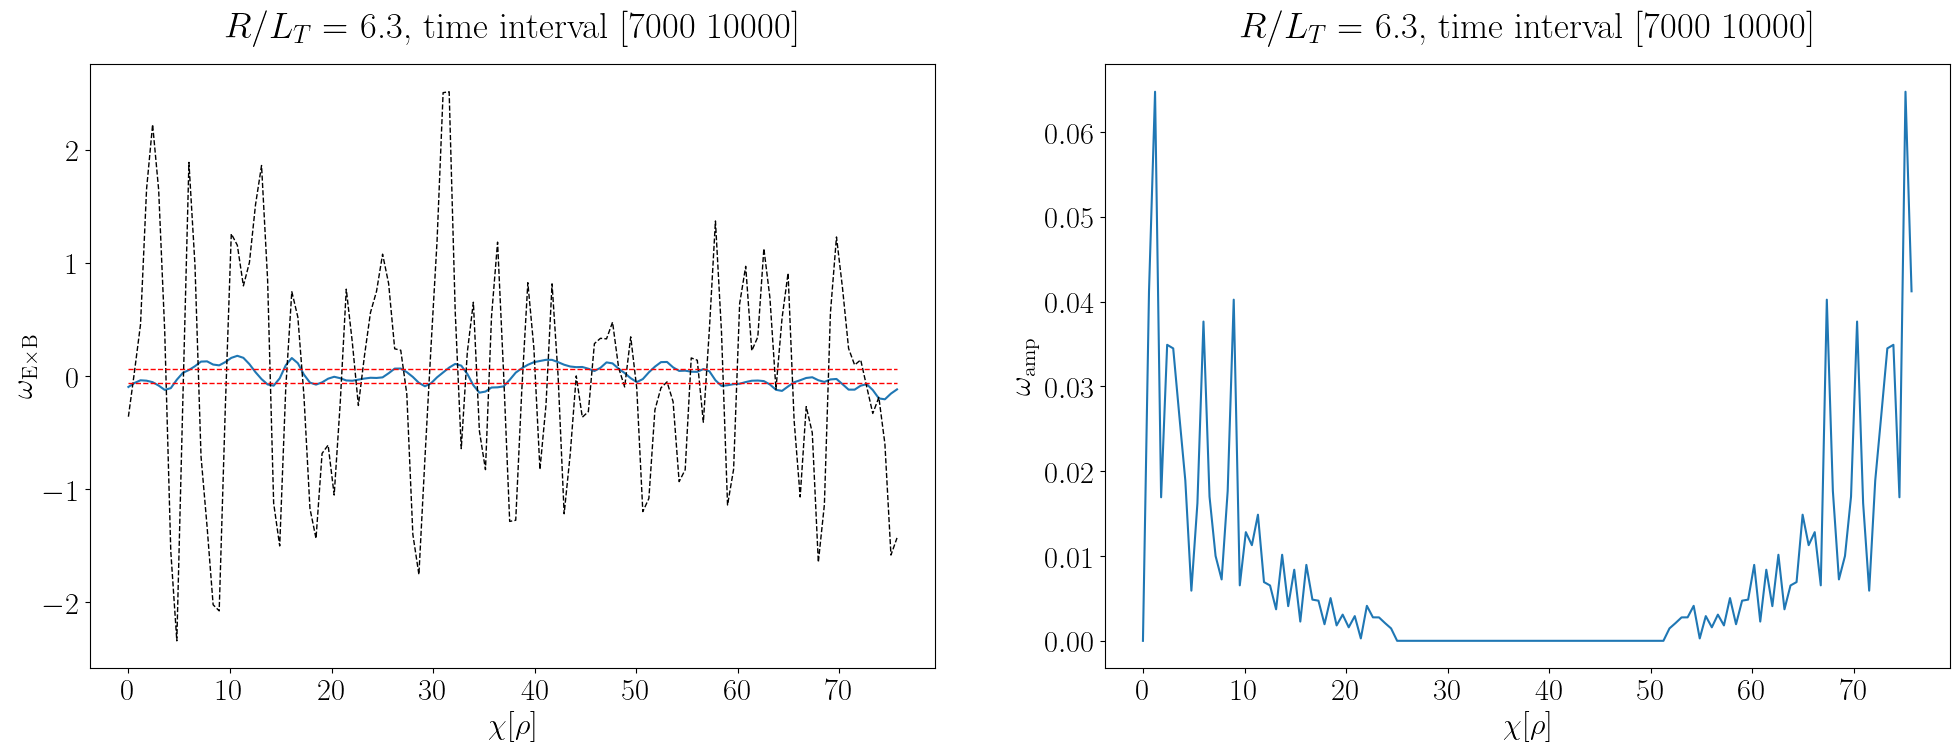

In [12]:
# Plot from 7000:10000 timesteps with mean over that interval
# Plot of a signal in the middle of the time interval (8500)
start, end = 7000, 10000
middle = int((end - start)/2 + start)

# Shearing rate with mean over time
wexb_rad_mean = np.mean(wexb[:,start:end],1)
wexb_rad_middle = wexb[:,middle]

# FT{shearing rate}
wexb_rad_mean_fft = np.fft.fft(wexb_rad_mean)
wexb_rad_mean_amp = 2/ zonal_pot.shape[0] * np.abs(wexb_rad_mean_fft)
wexb_rad_mean_amp_max = max(wexb_rad_mean_amp)

print('Maximal Amplitude: ', wexb_rad_mean_amp_max)

fig, ax = plt.subplots(1, 2, figsize=(24,8))

# Plot shearing rate
ax[0].plot(rad_coord, wexb_rad_mean)
ax[0].plot(rad_coord, wexb_rad_middle, 'black', linestyle='--', linewidth=1)
ax[0].plot(rad_coord, np.repeat(wexb_rad_mean_amp_max, len(rad_coord)), 'r', linestyle='--', linewidth=1)
ax[0].plot(rad_coord, -np.repeat(wexb_rad_mean_amp_max, len(rad_coord)), 'r', linestyle='--', linewidth=1)
ax[0].set_title(r'$R/L_T =$ ' + rlt + ', time interval [' + str(start) + ' ' + str(end) + ']', pad=20)
ax[0].set_xlabel(r'$\chi[\rho]$')
ax[0].set_ylabel(r'$\omega_{\mathrm{E \times B}}$')

plot.savefig_subplot(fig, ax[0], '../pictures/'+data+'/'+resolution+'/'+data+'_'+resolution+'_wexb_'+str(start)+'_'+str(end)+'.pdf', 0.02)

# FT{shearing rate}
ax[1].plot(rad_coord, wexb_rad_mean_amp)
ax[1].set_title(r'$R/L_T =$ ' + rlt + ', time interval [' + str(start) + ' ' + str(end) + ']', pad=20)
ax[1].set_xlabel(r'$\chi[\rho]$')
ax[1].set_ylabel(r'$\omega_{\mathrm{amp}}$')

plot.savefig_subplot(fig, ax[1],'../pictures/'+data+'/'+resolution+'/'+data+'_'+resolution+'_Amp_Rad_'+str(start)+'_'+str(end)+'.pdf', 0.02)